In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
train = pd.read_csv("train.csv", delimiter="\t")
test = pd.read_csv("test.csv", delimiter="\t")
train = train[train.goal.isna() == False]
train.rename(columns = {"well id" : "well_id", "depth, m" : "depth"}, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463897 entries, 0 to 465095
Data columns (total 16 columns):
well_id    463897 non-null float64
depth      463897 non-null float64
bk         396552 non-null float64
GZ1        404990 non-null float64
GZ2        405056 non-null float64
GZ3        406545 non-null float64
GZ4        154158 non-null float64
GZ5        149931 non-null float64
GZ7        151025 non-null float64
DGK        157839 non-null float64
NKTD       311684 non-null float64
NKTM       226261 non-null float64
NKTR       133922 non-null float64
ALPS       441181 non-null float64
lith       463897 non-null object
goal       463897 non-null float64
dtypes: float64(15), object(1)
memory usage: 60.2+ MB


# General information

In [3]:
train.describe()

,well_id,depth,bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,NKTD,NKTM,NKTR,ALPS,goal
count,463897.00000,463897.000000,396552.000000,404990.000000,405056.000000,406545.000000,154158.000000,149931.000000,151025.000000,157839.000000,311684.000000,226261.000000,133922.000000,441181.000000,463897.000000
mean,157.02981,2346.764379,0.354064,0.280254,0.388790,0.510815,0.487103,0.301386,0.554748,0.418060,0.385270,0.533739,0.447622,0.400610,0.150615
std,86.26215,385.069012,0.148669,0.157558,0.283688,0.230907,0.302675,0.152676,0.237662,0.123755,0.118957,0.082835,0.092444,0.243706,0.357674
min,1.00000,969.285000,0.111121,0.111175,0.111121,0.111125,0.111147,0.111164,0.111135,0.111285,0.119643,0.265249,0.111294,0.111111,0.000000
25%,80.00000,2175.387000,0.252554,0.183426,0.139547,0.323727,0.157994,0.189896,0.366555,0.352921,0.315576,0.473716,0.398218,0.182677,0.000000
50%,167.00000,2393.051000,0.338953,0.244243,0.245264,0.517278,0.495885,0.267452,0.591975,0.438447,0.364399,0.524870,0.451231,0.338253,0.000000
75%,233.00000,2581.806500,0.413153,0.298872,0.624742,0.691272,0.763175,0.358845,0.742175,0.497439,0.437514,0.572796,0.492776,0.574275,0.000000
max,287.00000,3155.591000,0.999848,0.999973,0.999756,0.999994,0.999960,0.998834,0.999648,0.999514,0.799599,0.799167,0.998569,0.999996,1.000000


In [4]:
test.describe()

,id,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,NKTD,NKTM,NKTR,ALPS
count,37604.000000,37604.000000,37604.000000,37604.000000,37604.000000,37604.000000,37604.000000,35641.000000,35601.000000,35609.000000,35403.000000,37586.000000,37604.000000,37604.000000,35643.000000
mean,18802.500000,140.124428,1760.559148,0.277690,0.262112,0.465806,0.413186,0.486373,0.310613,0.442750,0.390506,0.330386,0.494477,0.541928,0.367076
std,10855.484098,27.540308,483.074879,0.123030,0.185525,0.271956,0.209382,0.234537,0.241471,0.210756,0.106485,0.099167,0.068323,0.112130,0.210702
min,1.000000,47.000000,927.578000,0.111125,0.111123,0.111121,0.111128,0.111152,0.111164,0.111135,0.111285,0.138998,0.337366,0.141364,0.111124
25%,9401.750000,126.000000,1344.916500,0.188276,0.159585,0.181776,0.246883,0.326240,0.152889,0.273140,0.324693,0.265338,0.452898,0.455823,0.192149
50%,18802.500000,126.000000,1756.437500,0.255274,0.214564,0.442314,0.365857,0.466715,0.213163,0.399473,0.391665,0.319567,0.483183,0.545422,0.316420
75%,28203.250000,164.000000,2143.525000,0.331267,0.271652,0.682655,0.534275,0.648879,0.341137,0.571398,0.471873,0.376584,0.538589,0.627534,0.477626
max,37604.000000,176.000000,2687.774500,0.999383,0.999973,0.999756,0.999758,0.999445,0.998834,0.999648,0.999514,0.797744,0.793595,0.799763,0.999964


In [5]:
train.isna().sum()/len(train)

well_id    0.000000
depth      0.000000
bk         0.145172
GZ1        0.126983
GZ2        0.126841
GZ3        0.123631
GZ4        0.667689
GZ5        0.676801
GZ7        0.674443
DGK        0.659754
NKTD       0.328118
NKTM       0.512260
NKTR       0.711311
ALPS       0.048968
lith       0.000000
goal       0.000000
dtype: float64

# Single features

In [6]:
well_ids = list(range(1, 6))

## Depth

In [16]:
for well_id in well_ids:
    depth = train[train.well_id == well_id].depth
    print("Min/max depth: ", depth.min(), depth.max())

Min/max depth:  2184.337 2245.197
Min/max depth:  2419.722 2548.8705
Min/max depth:  2111.663 2224.8805
Min/max depth:  2228.013 2336.845
Min/max depth:  2535.714 2694.2185


## bk

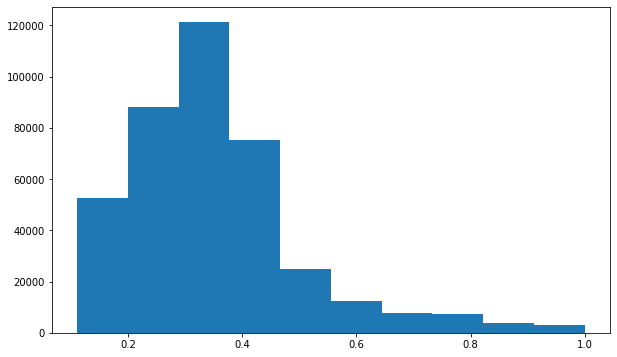

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(train.bk)

plt.show()

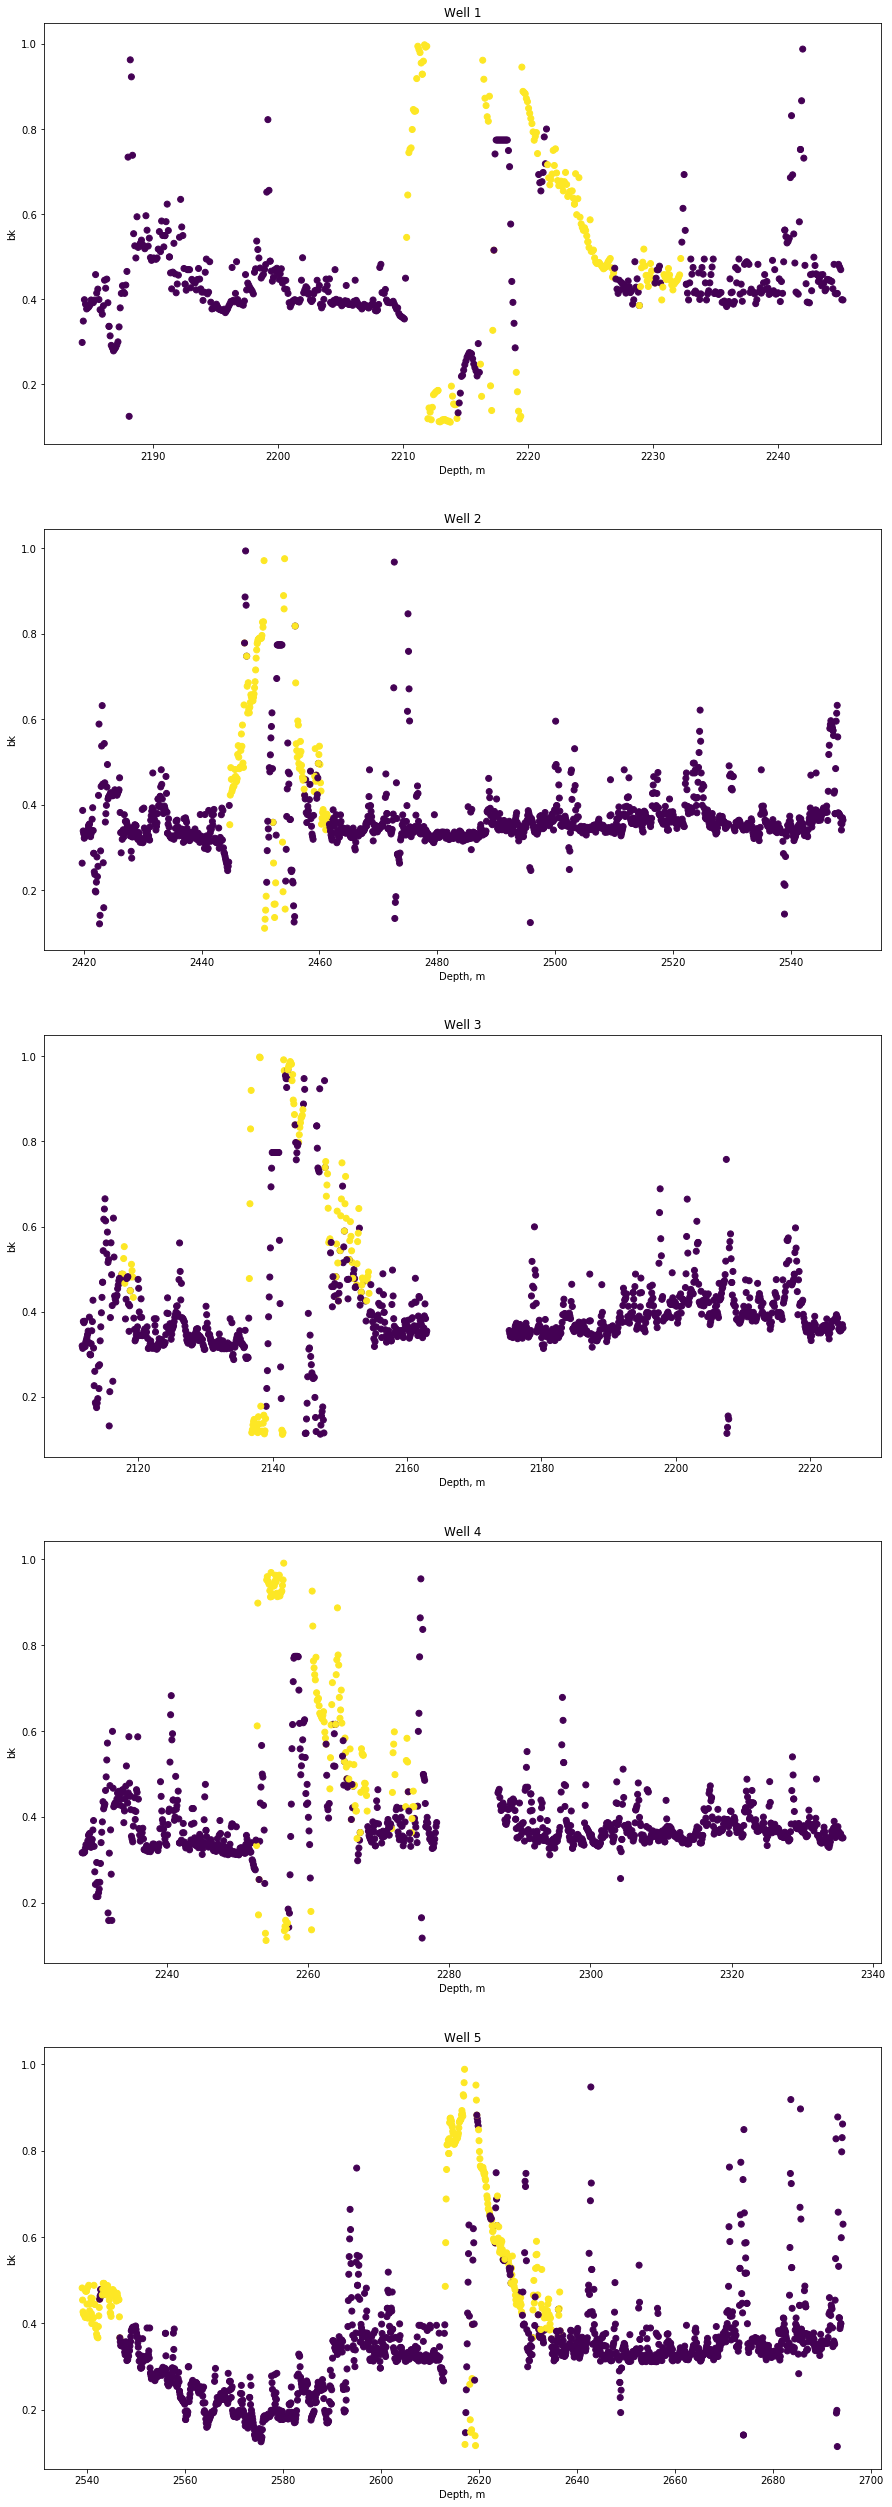

In [44]:
fig, axes = plt.subplots(5, 1, figsize=(15, 45))
for i, well_id in enumerate(well_ids):
    depth = train[train.well_id == well_id].depth
    bk = train[train.well_id == well_id].bk
    goal = train[train.well_id == well_id].goal
    axes[i].scatter(depth, bk, c=goal)
    axes[i].set_xlabel("Depth, m")
    axes[i].set_ylabel("bk")
    axes[i].set_title("Well " + str(well_id))

## GZ1 - 7

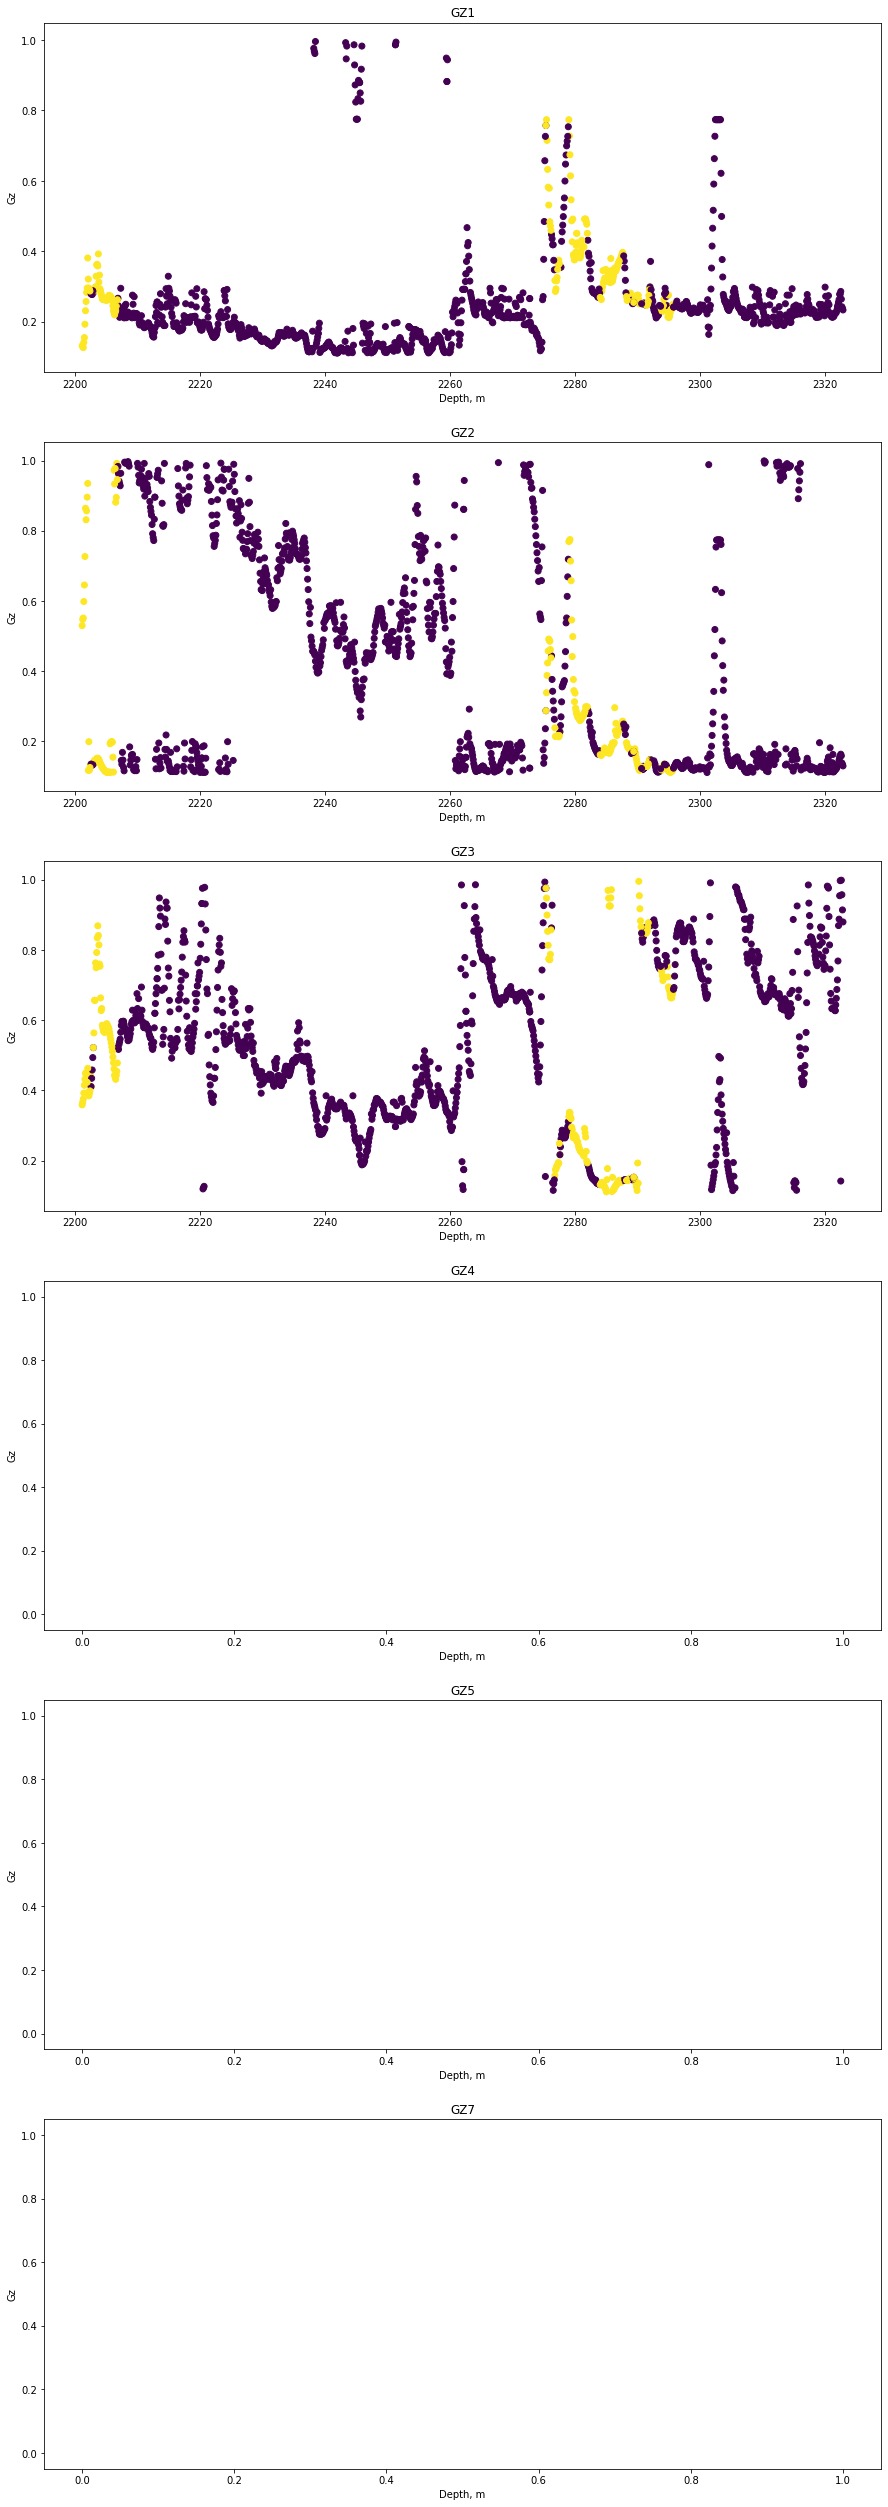

In [68]:
well_id = 200
fig, axes = plt.subplots(6, 1, figsize=(15, 45))
cnt = 0
for i in [i for i in range(1, 8) if i != 6]:
    depth = train[train.well_id == well_id].depth
    gz = train[train.well_id == well_id]["GZ" + str(i)]
    goal = train[train.well_id == well_id].goal
    axes[cnt].scatter(depth, gz, c=goal)
    axes[cnt].set_xlabel("Depth, m")
    axes[cnt].set_ylabel("Gz")
    axes[cnt].set_title("GZ" + str(i))
    cnt += 1

## DGK

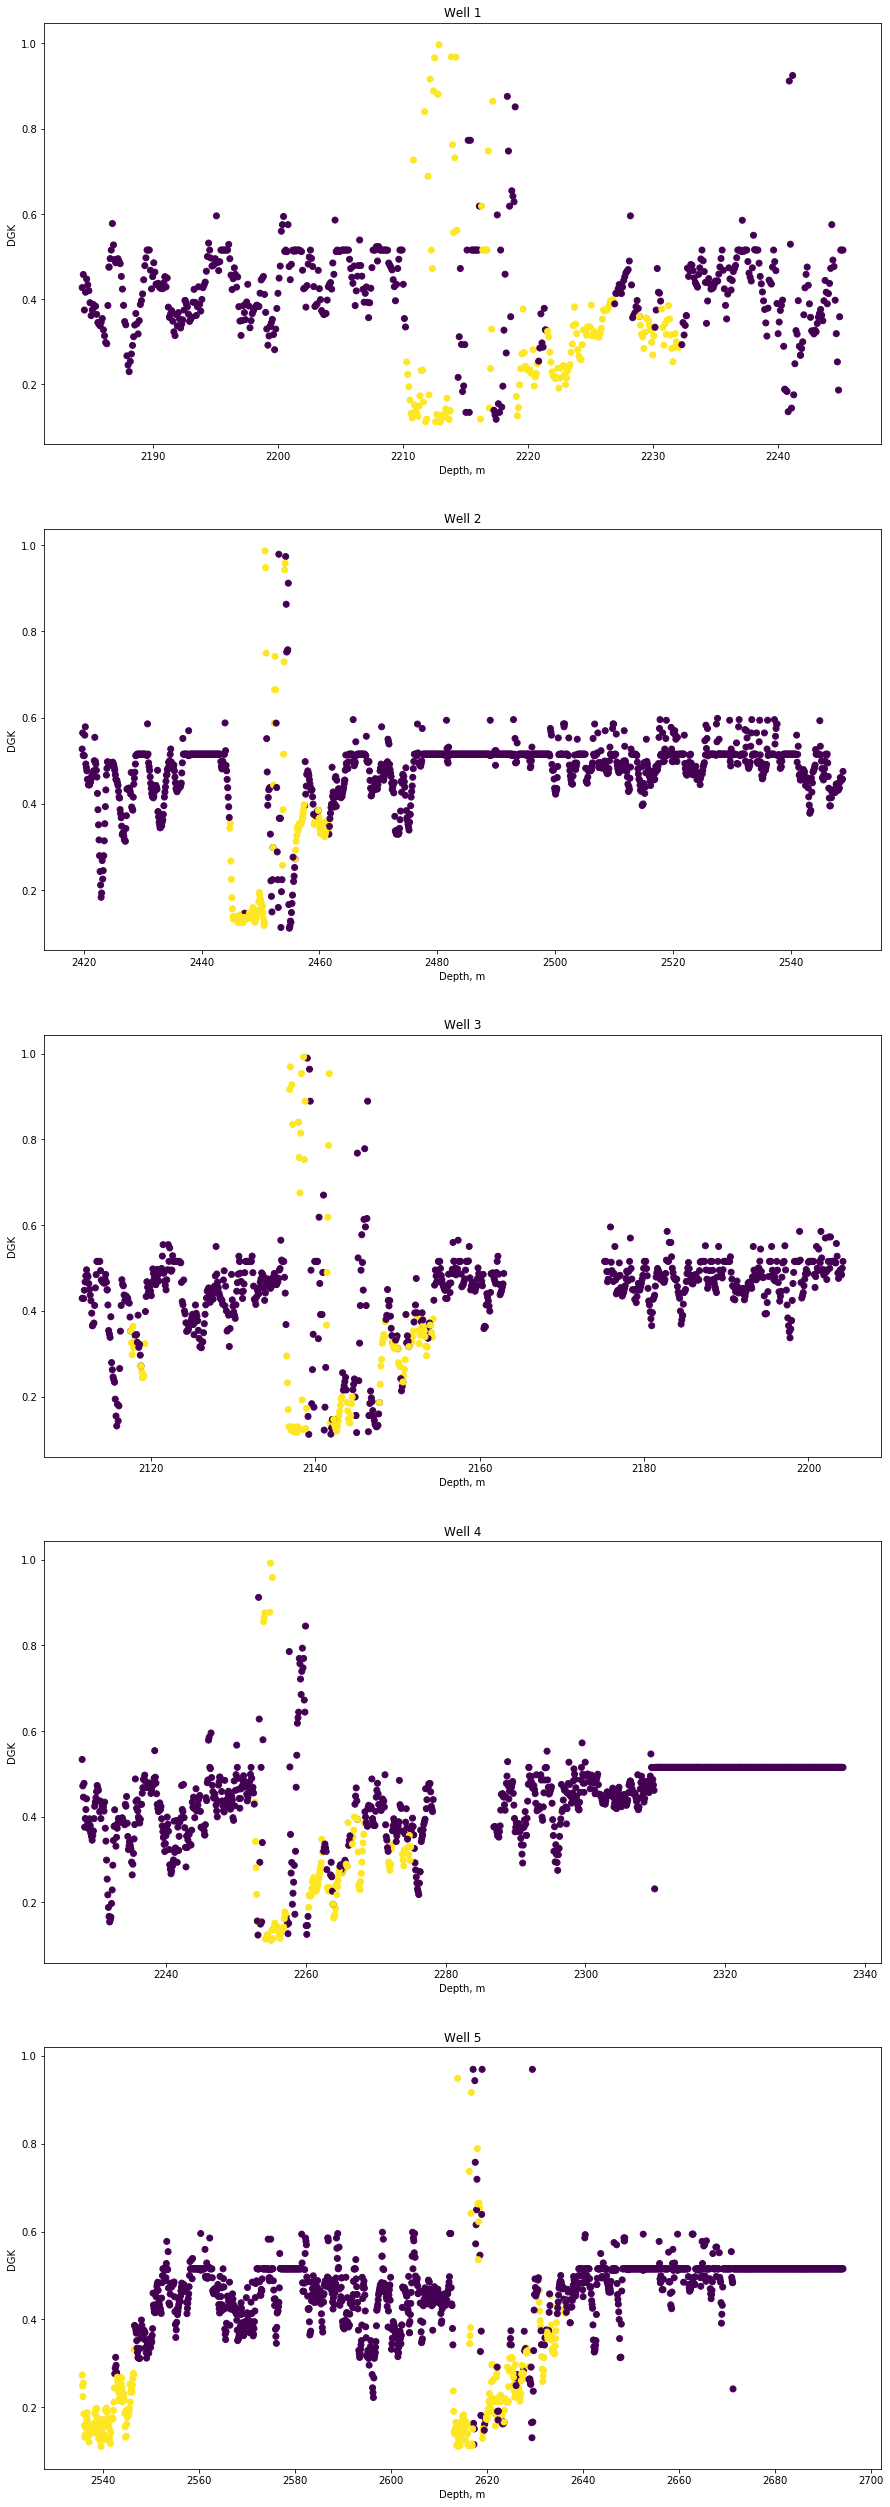

In [46]:
fig, axes = plt.subplots(5, 1, figsize=(15, 45))
for i, well_id in enumerate(well_ids):
    depth = train[train.well_id == well_id].depth
    DGK = train[train.well_id == well_id].DGK
    goal = train[train.well_id == well_id].goal
    axes[i].scatter(depth, DGK, c=goal)
    axes[i].set_xlabel("Depth, m")
    axes[i].set_ylabel("DGK")
    axes[i].set_title("Well " + str(well_id))

## NKTD, NKTM, NKTR

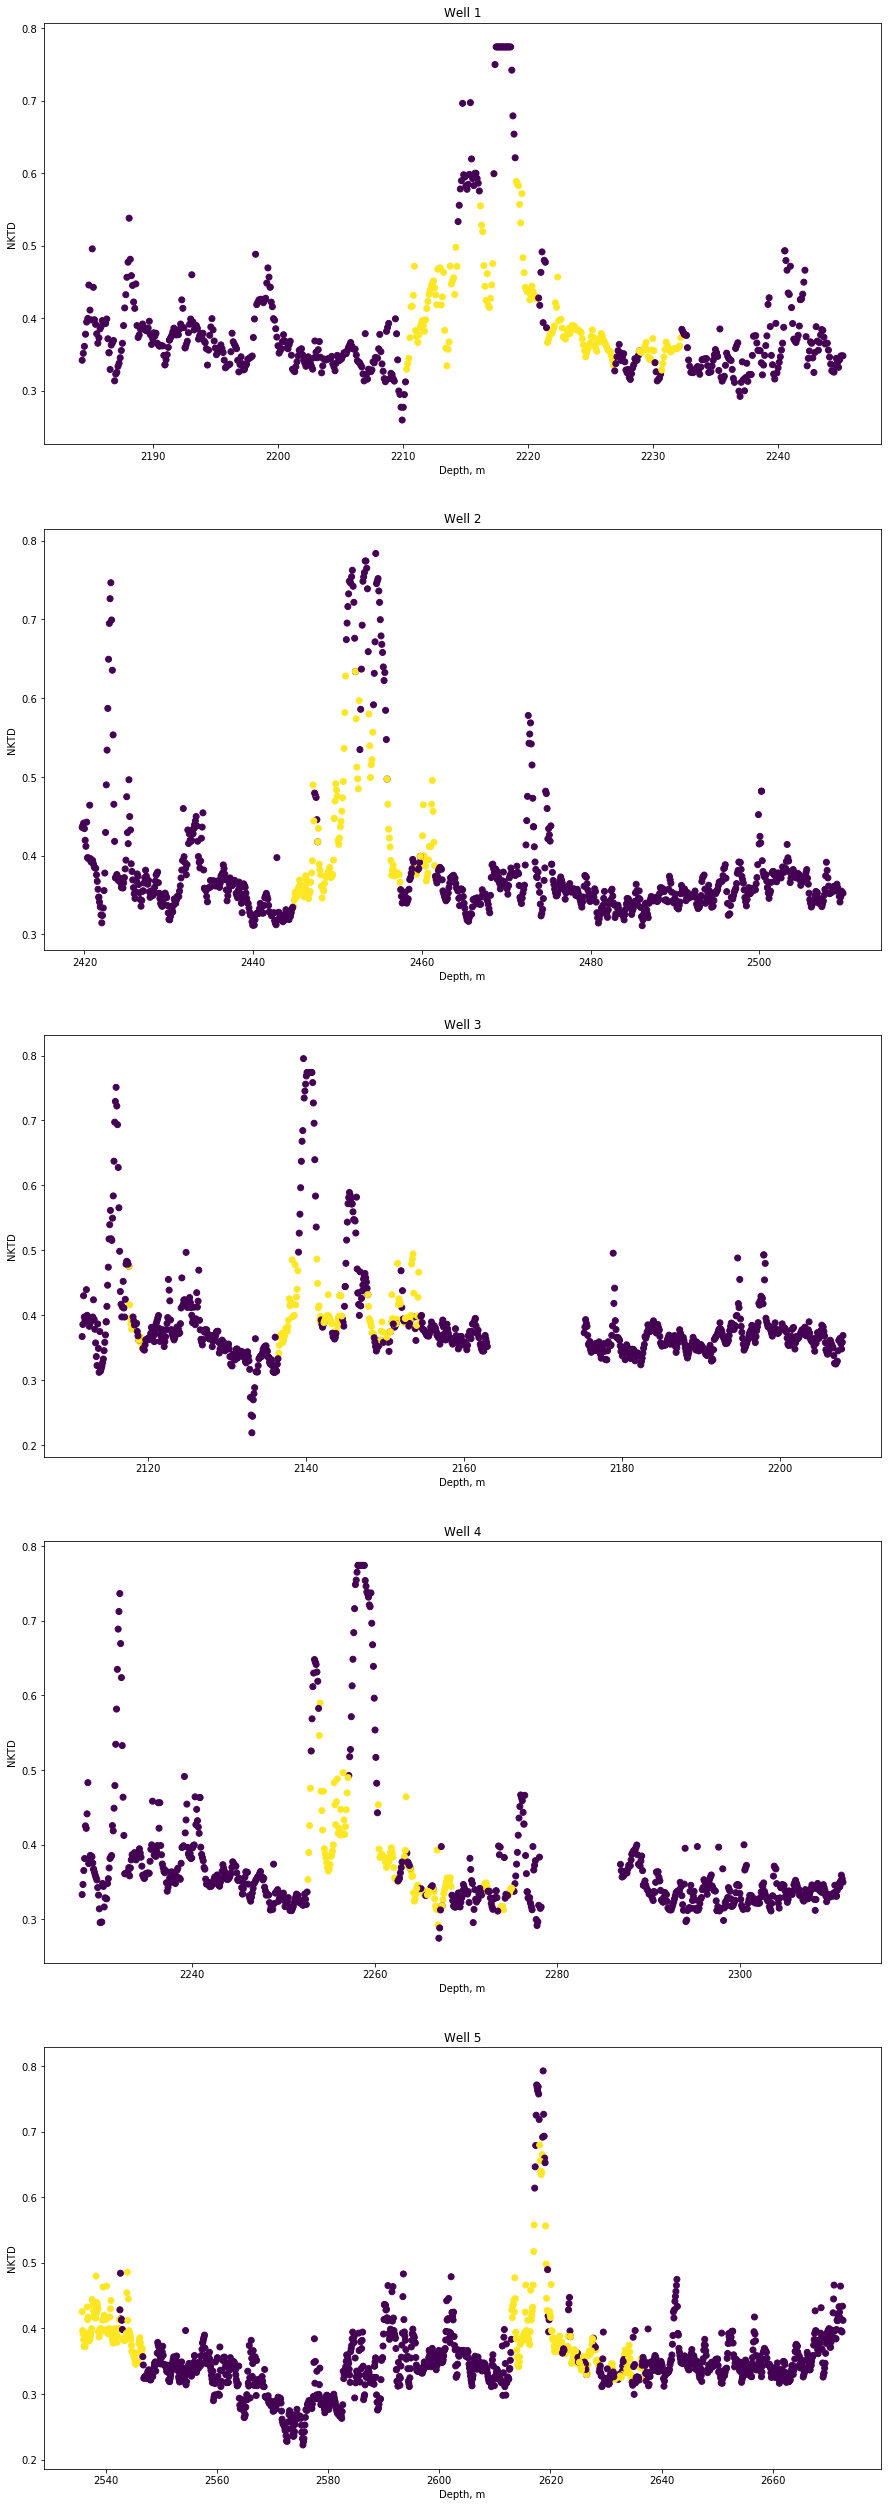

In [47]:
fig, axes = plt.subplots(5, 1, figsize=(15, 45))
for i, well_id in enumerate(well_ids):
    depth = train[train.well_id == well_id].depth
    NKTD = train[train.well_id == well_id].NKTD
    goal = train[train.well_id == well_id].goal
    axes[i].scatter(depth, NKTD, c=goal)
    axes[i].set_xlabel("Depth, m")
    axes[i].set_ylabel("NKTD")
    axes[i].set_title("Well " + str(well_id))

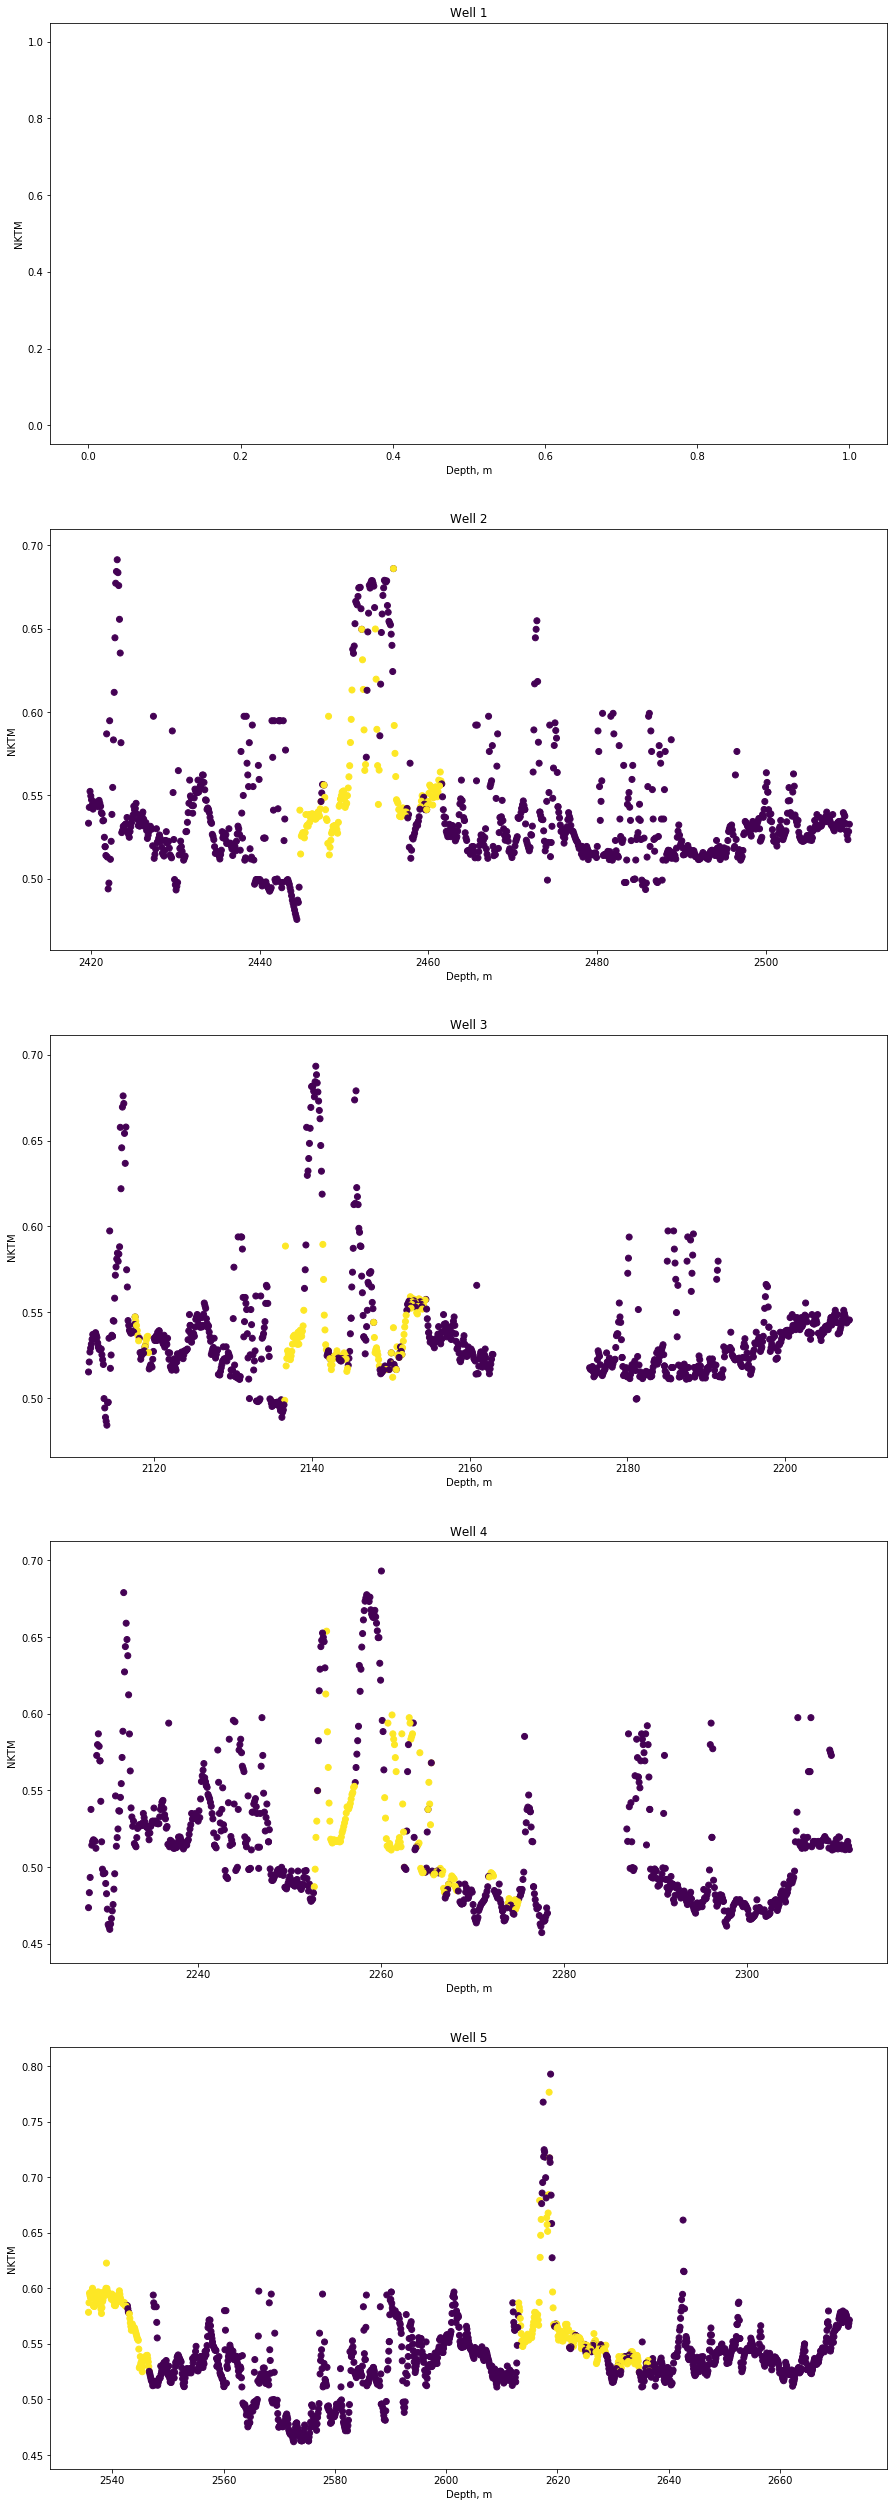

In [50]:
fig, axes = plt.subplots(5, 1, figsize=(15, 45))
for i, well_id in enumerate(well_ids):
    depth = train[train.well_id == well_id].depth
    NKTM = train[train.well_id == well_id].NKTM
    goal = train[train.well_id == well_id].goal
    axes[i].scatter(depth, NKTM, c=goal)
    axes[i].set_xlabel("Depth, m")
    axes[i].set_ylabel("NKTM")
    axes[i].set_title("Well " + str(well_id))

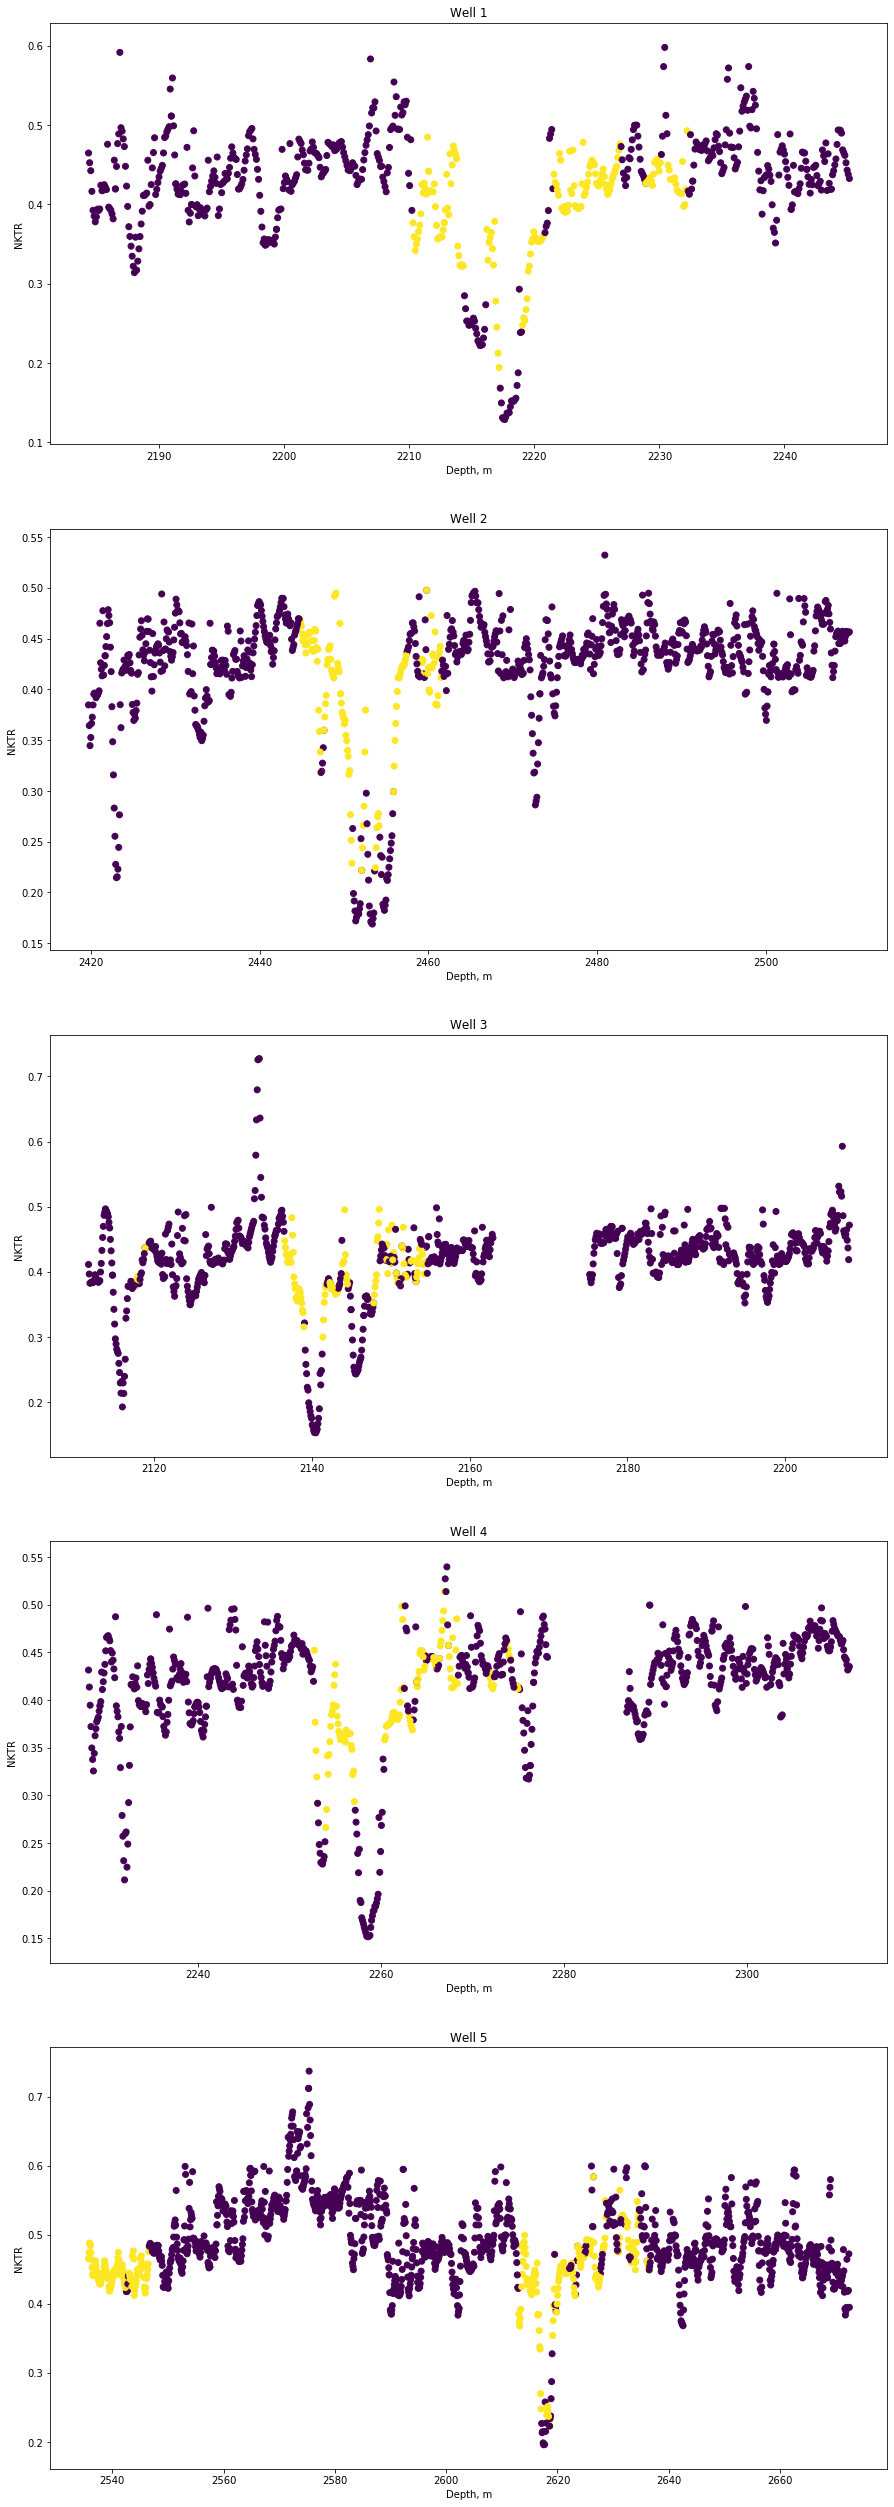

In [51]:
fig, axes = plt.subplots(5, 1, figsize=(15, 45))
for i, well_id in enumerate(well_ids):
    depth = train[train.well_id == well_id].depth
    NKTR = train[train.well_id == well_id].NKTR
    goal = train[train.well_id == well_id].goal
    axes[i].scatter(depth, NKTR, c=goal)
    axes[i].set_xlabel("Depth, m")
    axes[i].set_ylabel("NKTR")
    axes[i].set_title("Well " + str(well_id))

## ALPS

In [56]:
well_ids = list(range(10))

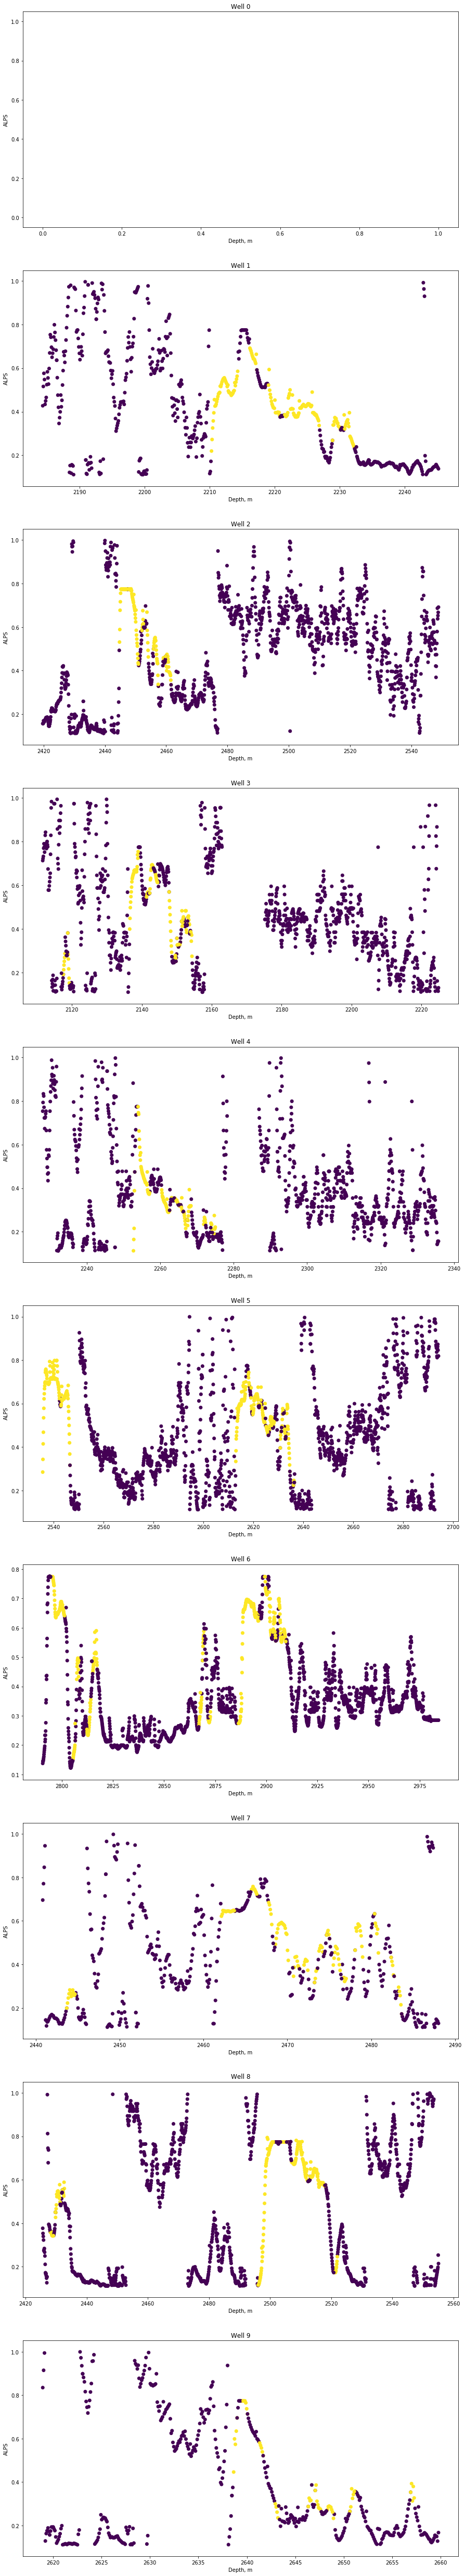

In [58]:
fig, axes = plt.subplots(len(well_ids), 1, figsize=(15, 9 * len(well_ids)))
for i, well_id in enumerate(well_ids):
    depth = train[train.well_id == well_id].depth
    ALPS = train[train.well_id == well_id].ALPS
    goal = train[train.well_id == well_id].goal
    axes[i].scatter(depth, ALPS, c=goal)
    axes[i].set_xlabel("Depth, m")
    axes[i].set_ylabel("ALPS")
    axes[i].set_title("Well " + str(well_id))

# Feature interactions

## Heatmap

In [53]:
def plot_heatmap(df, columns, method="pearson", size=12):
    correlations = df[columns].corr(method=method)
    fig = plt.figure(figsize=(size, size))
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0, len(columns), 1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(columns, fontsize="xx-large")
    ax.set_yticklabels(columns, fontsize="xx-large")

    plt.show()

In [67]:
df = pd.DataFrame({"A" : [3, 2, 1, 4, 5]})
df_2 = df.loc[df.A == 1, "A"]
df_2.head()

2    1
Name: A, dtype: int64

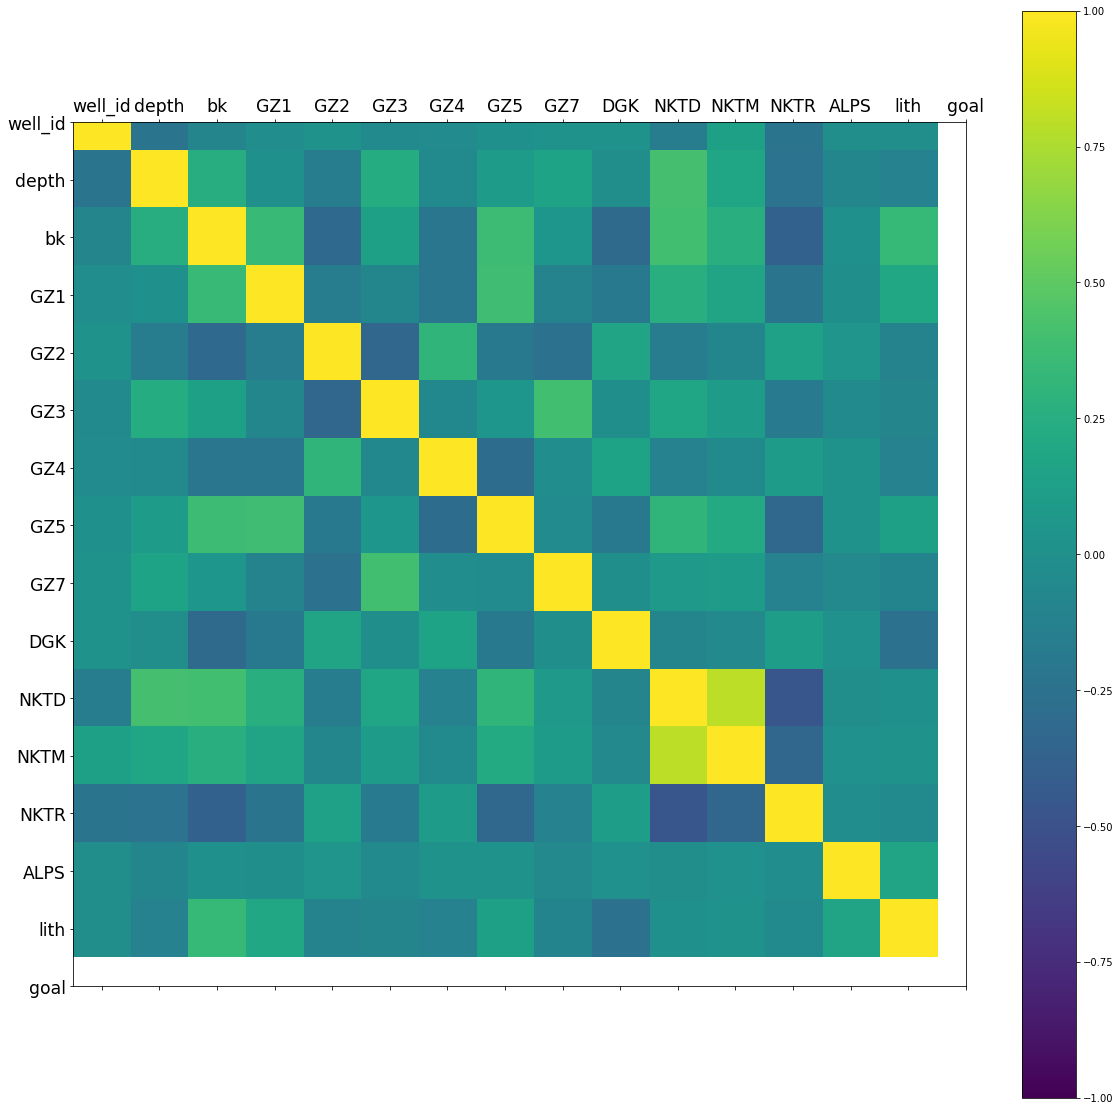

In [55]:
plot_heatmap(train, train.columns.values, size = 20)

## Clustering

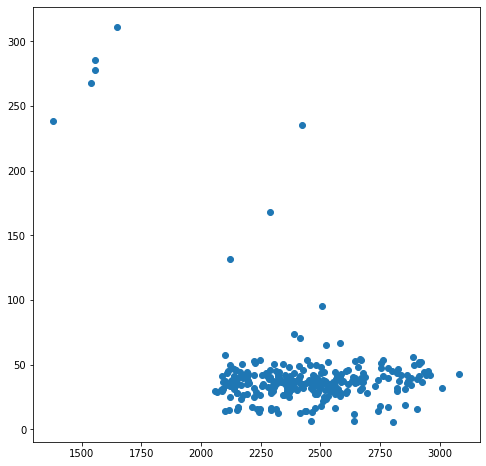

In [62]:
fig = plt.figure(figsize=(8, 8))
depth_stats = train.groupby("well_id").aggregate({"depth" : ["mean", "std"]})
depth_stats.columns = ['_'.join(col).strip() for col in depth_stats.columns.values]
depth_stats.reset_index(inplace=True)
plt.scatter(depth_stats.depth_mean, depth_stats.depth_std)

plt.show()